## lets understand whats overfitting is and how it affect our ml model
<h2 style="color:blue"><center> Don't forget to upvote📈 if you like👍🏻 it! It's free!

## Import Necessary Libraries and Data Sets.

In [1]:
import numpy as np
# to read our csv file
import pandas as pd
# matplotlib.pyplot is used for making graphs
import matplotlib.pyplot as plt
%matplotlib inline
# to train our model
from sklearn.ensemble import RandomForestClassifier
# to match the predicted value and real value of the predicting variable
from sklearn import metrics

# Overfitting

To explain overfitting, I think it’s best if we look at a dataset and i am going to use a dataset which do not need any feature engineering because our main target is to see overfitting of ml model.

My dataset is winequality-white.csv and I am going to use random forest model to see overfitting.

In [2]:
dataset = pd.read_csv('../input/wine-quality-selection/winequality-white.csv')

In [3]:
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Divide or split data into training data and test data

In [5]:
data_train = dataset.head(3000)
data_test = dataset.tail(1898)

In [6]:
# choose the columns you want to keep in training set
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
X_train=data_train[cols]
y_train=data_train.quality
X_test=data_test[cols]
y_test=data_test.quality

## Predictive Modeling
We will now train a random forest model on the training set.

In [7]:
random_forest = RandomForestClassifier(n_estimators=50)  
random_forest.fit(X_train,data_train.quality)
# generate predictions on the training set
y_train_pred = random_forest.predict(X_train)

# generate predictions on the test set
y_test_pred = random_forest.predict(X_test)

metrics.accuracy_score(y_train,y_train_pred)

1.0

In [8]:
# calculate the accuracy of predictions on test data set
metrics.accuracy_score(y_test, y_test_pred)

0.49262381454162274

### This is what we do and stop
### Therefore are unable to see overfitting of ml model but code below will produce a graph in which we can see overfitting of ml model

## Graph to see overfitting of ml model

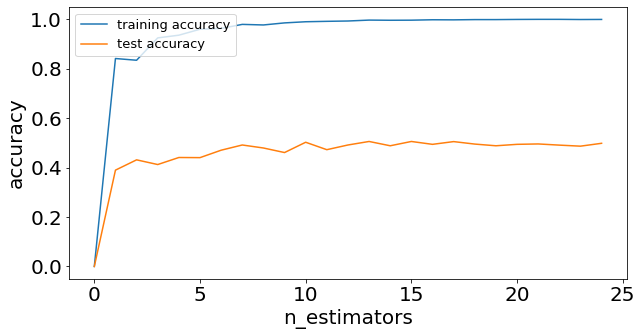

In [9]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
train_accuracies = [0]
test_accuracies = [0]
# iterate over a n_estimators values
for i in range(1, 25):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    y_train_pred = random_forest.predict(X_train)
    y_test_pred = random_forest.predict(X_test)
    train_accuracy = metrics.accuracy_score(data_train.quality, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="training accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 13})
plt.xticks(range(0, 26, 5))
plt.xlabel("n_estimators", size=20)
plt.ylabel("accuracy", size=20)
plt.show()


### For n_estimators equal to 0 for training accuracy and test accuracy a value of 0 is set by me beacuse n_estimators value can not be equal to 0

The best score for test data for any n_estimators depend on the dataset. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing until it becomes 1. It means that our Random Forest Classifier model keeps learning about the training data better and better with an increase in n_estimators untill our training data accuracy becomes one, but the performance on test data does not improve at all after a certain value of n_estimators. 

This is called overfitting.

## Now lets see bookish defination
### Overfitting in Machine Learning
Overfitting refers to a model that models the training data too well.

Overfitting a model is a condition where a statistical model begins to describe the random error in the data rather than the relationships between variables. This problem occurs when the model is too complex. 

### Problems of overfitting in Machine Learning
In regression analysis, overfitting can produce misleading R-squared values, regression coefficients, and p-values. 

## Plz Upvote!